In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Ornstein-Uhlenbeck Process

The Ornstein-Uhlenbeck process is a continuous-time stochastic process $X_t$ solving the following stochastic differential equation:

$$dX_t = \alpha(\mu - X_t)dt + \sigma dW_t$$

where $\alpha, \mu, \sigma$ are constants and $W_t$ is a Wiener process.
The process is driven by a deterministic term and a stochastic term, weighted by $\alpha$ and $\sigma$ respectively. 
The deterministic term tends to pull the process towards the mean $\mu$, while the stochastic term adds fluctuations.

The solution to this SDE is given by:

$$X_t = X_0 e^{-\alpha t} + \mu(1 - e^{-\alpha t}) + \sigma e^{-\alpha t} \int_0^t e^{\alpha s} dW_s$$

where $X_0$ is the initial value of the process.

One can show that the distribution of $X_t$ is Gaussian with mean $\mu(1 - e^{-\alpha t})$ and variance $\frac{\sigma^2}{2\alpha}(1 - e^{-2\alpha t})$.


In [5]:
def Ornstein_Uhlenbeck_sample_path(T, dt, x0, mu, alpha, sigma):

    t = np.arange(0, T, dt)
    path = []
    x = x0
    
    for i in range(len(t)):
        dW_t = np.sqrt(dt) * np.random.randn()
        x += -alpha*(x - mu)*dt + sigma*dW_t
        path.append(x)

    return t, path

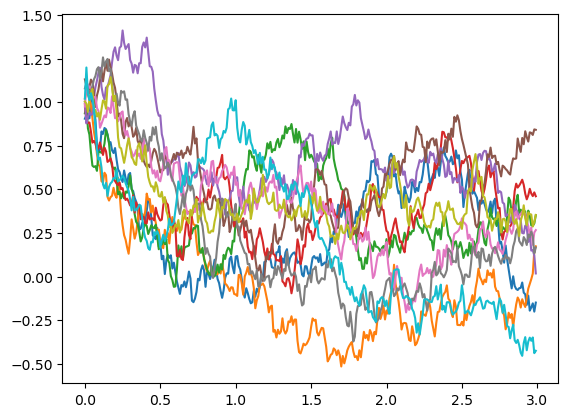

In [12]:
# parameters
mu = 0.
alpha = 1.
sigma = 0.5

# number of sample paths
N = 10

# length of the sample paths
T = 3
dt = 0.01

# initial value
x0 = 1

for i in range(N):
    t, path = Ornstein_Uhlenbeck_sample_path(T, dt, x0, mu, alpha, sigma)
    plt.plot(t, path)